In [86]:
# pip install world_bank_data --upgrade

In [87]:
import pandas as pd
import world_bank_data as wb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Documentation
https://pypi.org/project/world-bank-data/

Example: https://mybinder.org/v2/gh/mwouts/world_bank_data/master

https://hub.gke2.mybinder.org/user/mwouts-world_bank_data-64c2qdnf/tree/examples

### Overview API commands for testing purposes

In [88]:
#API commands
wb.get_topics()
wb.get_sources()
wb.get_countries()
wb.get_indicators(topics=1)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Poverty
1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Poverty
1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Poverty
1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of data from Nation...,Poverty
1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Poverty
...,...,...,...,...,...,...
WP15163_4.3,"Mobile account, female (% age 15+)",,WDI Database Archives,Mobile account denotes the percentage of respo...,"Demirguc-Kunt et al., 2015, Global Financial I...","Financial Sector ,Gender"
WP15163_4.8,"Mobile account, income, poorest 40% (% ages 15+)",,WDI Database Archives,Mobile account denotes the percentage of respo...,"Demirguc-Kunt et al., 2015, Global Financial I...",Financial Sector
WP15163_4.9,"Mobile account, income, richest 60% (% ages 15+)",,WDI Database Archives,Mobile account denotes the percentage of respo...,"Demirguc-Kunt et al., 2015, Global Financial I...",Financial Sector


### Overview of Indicators we are interested in

* SP.POP.TOTL     : population
* NY.GDP.MKTP.CD  :GDP
* NY.GDP.PCAP.CD  :GDP_per_cap
* SP.DYN.LE00.IN  :Life expectancy
* SH.STA.DIAB.ZS  :Diabetes percent (% of population ages 20 to 79)
* EN.ATM.CO2E.PC  :CO2 per cap
* SL.UEM.TOTL.ZS  :Unemployment
* EG.USE.PCAP.KG.OE :energy use per cap ## 224 empty
* SE.PRM.CMPT.ZS : primary schooling competion rate # viel leer
* SE.PRM.ENRL.TC.ZS   ::Pupil-teacher ratio, primary # 213 nan
* SE.ADT.1524.LT.ZS :: literacy_youth #viel leer
* SE.XPD.TOTL.GD.ZS :: Government expenditure on education, total (% of GDP)#203 leer
* SP.RUR.TOTL.ZS ::: % Rural Pop
* EG.USE.PCAP.KG.OE :: Energy use per capita in kg of oil
* EG.FEC.RNEW.ZS Renewable energy consumption (% of total final energy consumption)
* EN.ATM.PM25.MC.ZS Population suffering fom airpolution


### Setting up our dataframe with countries and indicators


In [89]:
#picking countries
df=pd.DataFrame()
df['Country']=list(wb.get_countries()['name'].loc[wb.get_countries()['region'] != 'Aggregates'])

In [90]:
indicators = ["SP.POP.TOTL","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD",'SP.DYN.LE00.IN','SH.STA.DIAB.ZS','EN.ATM.CO2E.PC','SE.PRM.ENRL.TC.ZS','SL.UEM.TOTL.ZS','SE.XPD.TOTL.GD.ZS','SP.RUR.TOTL.ZS','EG.FEC.RNEW.ZS','EN.ATM.PM25.MC.ZS']
from functools import reduce
data_all = []
for i in range(0, (len(indicators))):
    data = pd.DataFrame(wb.get_series(indicators[i],mrv=1)).reset_index()
    data = data.drop(labels=['Series','Year'],axis='columns')
    data_all.append(data)
    
data_all
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='Country'), data_all).rename(columns={"SP.POP.TOTL":'population',"NY.GDP.MKTP.CD":'GDP_in_Dollar','NY.GDP.PCAP.CD':'gdp_per_cap','SP.DYN.LE00.IN':'life_exp','SH.STA.DIAB.ZS':'diabetes_percent','EN.ATM.CO2E.PC':'co2_per_cap','SL.UEM.TOTL.ZS':'unemp','SE.PRM.ENRL.TC.ZS':'teacher','SP.RUR.TOTL.ZS':'rural_pop','EG.FEC.RNEW.ZS':'renewable_percent','SE.XPD.TOTL.GD.ZS':'educat_expen','EN.ATM.PM25.MC.ZS':'airpollution'})
df

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,teacher,unemp,educat_expen,rural_pop,renewable_percent,airpollution
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,NaN,10.191472,NaN,40.798353,4.094037,100.000000
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,NaN,8.092527,5.16919,48.630009,8.825977,99.998738
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,NaN,3.641848,NaN,37.561644,17.121893,97.949799
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,NaN,5.844164,NaN,54.459204,25.554845,99.353070
4,East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,NaN,3.897888,NaN,40.113467,13.857603,96.877523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),1.066310e+05,NaN,NaN,79.568293,12.300000,NaN,NaN,8.759000,NaN,4.168000,3.877525,40.000000
260,West Bank and Gaza,4.685306e+06,NaN,NaN,73.895000,9.500000,0.740607,NaN,26.098000,NaN,23.560000,10.472715,100.000000
261,"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,NaN,12.830000,NaN,62.727000,2.276417,100.000000
262,Zambia,1.786103e+07,2.330977e+10,1305.063254,63.510000,4.500000,0.314183,NaN,11.412000,NaN,55.928000,87.985452,100.000000


In [91]:
# all features with explanation
descriptions=[]
for i in range(len(indicators)):
    descriptions.append(wb.get_series(indicators[i],mrv=1).reset_index()['Series'].unique())

desc=pd.DataFrame(descriptions,indicators).reset_index().rename(columns={'index':'abbrev','0':'Description'})

In [92]:
desc

,abbrev,0
0,SP.POP.TOTL,"Population, total"
1,NY.GDP.MKTP.CD,GDP (current US$)
2,NY.GDP.PCAP.CD,GDP per capita (current US$)
3,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)"
4,SH.STA.DIAB.ZS,Diabetes prevalence (% of population ages 20 t...
5,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
6,SE.PRM.ENRL.TC.ZS,"Pupil-teacher ratio, primary"
7,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (..."
8,SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ..."
9,SP.RUR.TOTL.ZS,Rural population (% of total population)


#### addin a line indicating how many values are missing in the respective column

In [93]:
empty=pd.DataFrame(df.isnull().sum()).transpose()

In [94]:
pd.concat([empty,df],axis=0)

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,teacher,unemp,educat_expen,rural_pop,renewable_percent,airpollution
0,0,2.000000e+00,3.400000e+01,34.000000,20.000000,8.000000,16.000000,260.0,31.000000,247.00000,4.000000,5.000000,24.000000
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,NaN,10.191472,NaN,40.798353,4.094037,100.000000
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,NaN,8.092527,5.16919,48.630009,8.825977,99.998738
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,NaN,3.641848,NaN,37.561644,17.121893,97.949799
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,NaN,5.844164,NaN,54.459204,25.554845,99.353070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),1.066310e+05,NaN,NaN,79.568293,12.300000,NaN,NaN,8.759000,NaN,4.168000,3.877525,40.000000
260,West Bank and Gaza,4.685306e+06,NaN,NaN,73.895000,9.500000,0.740607,NaN,26.098000,NaN,23.560000,10.472715,100.000000
261,"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,NaN,12.830000,NaN,62.727000,2.276417,100.000000
262,Zambia,1.786103e+07,2.330977e+10,1305.063254,63.510000,4.500000,0.314183,NaN,11.412000,NaN,55.928000,87.985452,100.000000


### droping columns with loads of missing data

In [95]:
df.drop(["teacher","educat_expen"], axis=1, inplace=True)

### Subsetting for countries that miss no data

In [96]:
df.dropna(axis=0, how='any',inplace=True)
df.head()

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070
4,East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523


### LOOKING AT INDIVIFUAL VALUES

### multicollinearity

In [97]:
df_corr = pd.DataFrame(df,columns=['Population_in_mil','gdp_per_cap',"life_exp","diabetes_percent","co2_per_cap","unemp","rural_pop","renewable_percent","airpolution"]).corr()
df_corr

,Population_in_mil,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpolution
Population_in_mil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gdp_per_cap,NaN,1.000000,0.658817,0.012445,0.600567,-0.150924,-0.603099,-0.360881,NaN
life_exp,NaN,0.658817,1.000000,0.265200,0.499971,-0.041349,-0.635301,-0.660758,NaN
diabetes_percent,NaN,0.012445,0.265200,1.000000,0.278864,0.026406,-0.041225,-0.385062,NaN
co2_per_cap,NaN,0.600567,0.499971,0.278864,1.000000,-0.127186,-0.551158,-0.546155,NaN
unemp,NaN,-0.150924,-0.041349,0.026406,-0.127186,1.000000,-0.102797,-0.169728,NaN
rural_pop,NaN,-0.603099,-0.635301,-0.041225,-0.551158,-0.102797,1.000000,0.553132,NaN
renewable_percent,NaN,-0.360881,-0.660758,-0.385062,-0.546155,-0.169728,0.553132,1.000000,NaN
airpolution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


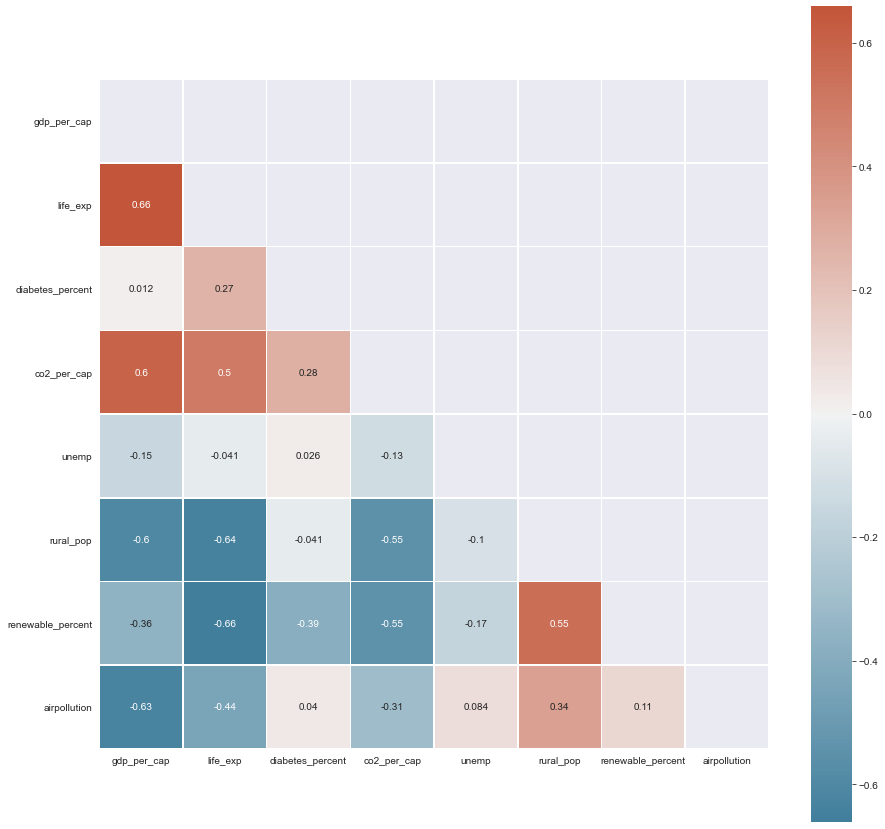

In [98]:
corr = df.drop(['GDP_in_Dollar','population'],axis=1).corr() #correlation matix ohne gsd und ohne population
f, ax = plt.subplots(figsize=(15, 15)) 
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
#preparing cmap 
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True) 
plt.show()

### Standardizing numeric features

In [99]:
# standardizer
from sklearn.preprocessing import StandardScaler
df_num=df.select_dtypes(include = np.number)
transformer = StandardScaler().fit(df_num)
num_stand_array = transformer.transform(df_num)
df_num_stand=pd.DataFrame(num_stand_array, columns=df_num.columns)
df_num_stand.describe()
#looking good

,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution
count,210.000000,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,0.000000,-5.075305e-17,1.903239e-16,4.483186e-16,1.448577e-16,1.268826e-17,-4.229421e-17,1.860945e-16,-3.912214e-17,3.235507e-16
std,1.002389,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-0.354314,-3.254990e-01,-7.121192e-01,-2.659303e+00,-1.867912e+00,-8.134573e-01,-1.401262e+00,-1.942707e+00,-1.217575e+00,-3.522807e+00
25%,-0.350511,-3.240827e-01,-6.222900e-01,-7.394672e-01,-6.100930e-01,-6.601268e-01,-6.058729e-01,-8.424558e-01,-8.026094e-01,2.714103e-01
50%,-0.339503,-3.181813e-01,-4.032232e-01,1.941237e-01,-2.409504e-01,-3.162295e-01,-2.789532e-01,-4.545443e-03,-2.953094e-01,4.108470e-01
75%,-0.260201,-2.418278e-01,1.044857e-01,6.976689e-01,4.982370e-01,3.181741e-01,3.192106e-01,8.046335e-01,7.083582e-01,4.108470e-01
max,6.741290,8.040377e+00,5.378576e+00,1.671407e+00,3.874305e+00,6.400972e+00,4.622628e+00,2.095275e+00,2.278692e+00,4.108470e-01


In [100]:
df_num_stand

,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution
0,0.041240,-0.057080,-0.375582,-0.039056,1.286480,0.059768,0.743424,-0.043652,-1.068189,0.410847
1,-0.347566,-0.318133,-0.167159,0.213330,1.038565,0.760493,0.298141,0.320891,-0.895526,0.410797
2,-0.259741,-0.166522,0.141508,0.673861,-0.419779,0.368546,-0.646054,-0.194312,-0.592819,0.330199
3,2.688114,0.816920,-0.532088,-0.221578,0.617897,-0.379285,-0.178841,0.592224,-0.285111,0.385399
4,1.809964,2.246001,-0.112387,0.548582,0.101561,0.311821,-0.591736,-0.075532,-0.711929,0.288020
...,...,...,...,...,...,...,...,...,...,...
205,-0.354133,-0.325450,-0.560223,-0.243668,1.112572,-0.716610,-0.483518,1.530004,0.100072,0.410847
206,-0.265212,-0.300582,-0.581515,0.444977,-0.500717,-0.432725,-0.989698,1.007091,0.059478,0.410847
207,-0.327444,-0.323387,-0.684813,-0.826548,-0.664781,-0.741932,1.303177,0.977068,-1.134512,0.410847
208,-0.337894,-0.323318,-0.656567,-1.183143,-0.910876,-0.756083,1.002354,0.660593,1.992903,0.410847


### How many clusters we need with Silhouette Score

In [101]:
df_num_stand.drop(['GDP_in_Dollar','population'],axis=1,inplace=True)

Text(0.5, 1.0, 'Silhouette Score for KMeans')

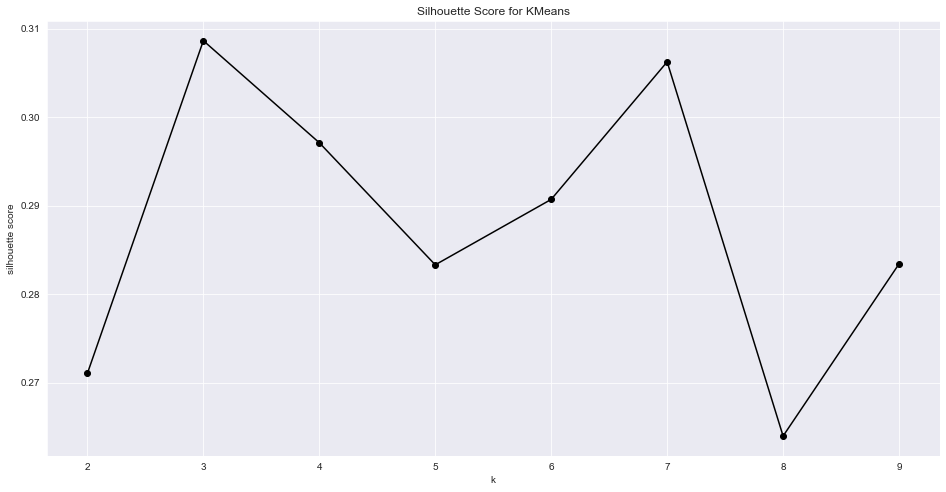

In [102]:
# How many clusters???
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2,10) # 
silhouette_kmeans = []

for k in K:
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(df_num_stand)
    silhouette_kmeans.append(silhouette_score(df_num_stand, model.fit_predict(df_num_stand)))

plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plt.plot(K, silhouette_kmeans, 'bo-',color='black')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for KMeans')

### KMEANS WITH 3 CLUSTERS

In [74]:
#4 cluster solution
from sklearn.cluster import KMeans

#labels
model_3 = KMeans(n_clusters=3, random_state = 100).fit(df_num_stand)

df_num_stand["cluster"] = model_3.labels_ #adding a column that tells in which cluster a record ends up
df_num_stand

,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution,cluster
0,-0.375582,-0.039056,1.286480,0.059768,0.743424,-0.043652,-1.068189,0.410847,2
1,-0.167159,0.213330,1.038565,0.760493,0.298141,0.320891,-0.895526,0.410797,2
2,0.141508,0.673861,-0.419779,0.368546,-0.646054,-0.194312,-0.592819,0.330199,2
3,-0.532088,-0.221578,0.617897,-0.379285,-0.178841,0.592224,-0.285111,0.385399,2
4,-0.112387,0.548582,0.101561,0.311821,-0.591736,-0.075532,-0.711929,0.288020,2
...,...,...,...,...,...,...,...,...,...
205,-0.560223,-0.243668,1.112572,-0.716610,-0.483518,1.530004,0.100072,0.410847,2
206,-0.581515,0.444977,-0.500717,-0.432725,-0.989698,1.007091,0.059478,0.410847,2
207,-0.684813,-0.826548,-0.664781,-0.741932,1.303177,0.977068,-1.134512,0.410847,2
208,-0.656567,-1.183143,-0.910876,-0.756083,1.002354,0.660593,1.992903,0.410847,0


In [75]:
df_cluster_3=pd.concat([df.reset_index(drop=True),df_num_stand.cluster.reset_index(drop=True)],axis=1)
df_cluster_3

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution,cluster
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000,2
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738,2
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799,2
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070,2
4,East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523,2
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Vanuatu,2.998820e+05,9.342400e+08,3115.358620,70.323000,11.900000,0.527000,4.408000,74.606000,36.111065,100.000000,2
206,Vietnam,9.646211e+07,2.619212e+11,2715.276036,75.317000,6.000000,2.057566,2.022000,63.372000,34.998570,100.000000,2
207,"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,12.830000,62.727000,2.276417,100.000000,2
208,Zambia,1.786103e+07,2.330977e+10,1305.063254,63.510000,4.500000,0.314183,11.412000,55.928000,87.985452,100.000000,0


In [76]:
df_cluster_3['cluster'].value_counts()

2    117
0     53
1     40
Name: cluster, dtype: int64

### KMEANS MAP PRESENTATION 3 CLUSTERS
GEO PANDAS https://geopandas.org/mapping.html

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [78]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world=world.rename(columns={'name':'Country'})

various countries are slightly differently named by geopandas vs. worldbank.
* trying to take care of this with manually setting up a dictionary
* countries will be missing in the map - noteably France & Italy - since they had missing values in the releveant world bank data

In [79]:
dic={'United States of America':'United States',
'Russia':'Russian Federation',
'South Korea': 'Korea, Rep.',
'Egypt': 'Egypt, Arab Rep.',
'Bosnia and Herz.':'Bosnia and Herzegovina',
'Central African Rep.':'Central African Republic',
"Côte d'Ivoire":"Cote d'Ivoire",
'Dem. Rep. Congo':'Congo, Dem. Rep.',
'Eq. Guinea':'Equatorial Guinea',
'Yemen':'Yemen, Rep.',
'Slovakia':'Slovak Republic',
'Kyrgyzstan':'Kyrgyz Republic'}

In [80]:
world.Country=world.Country.replace(dic)

In [82]:
world_3=world.merge(df_cluster_3[['Country','cluster']], on='Country', how='left')
world_3['cluster']=world_3['cluster']


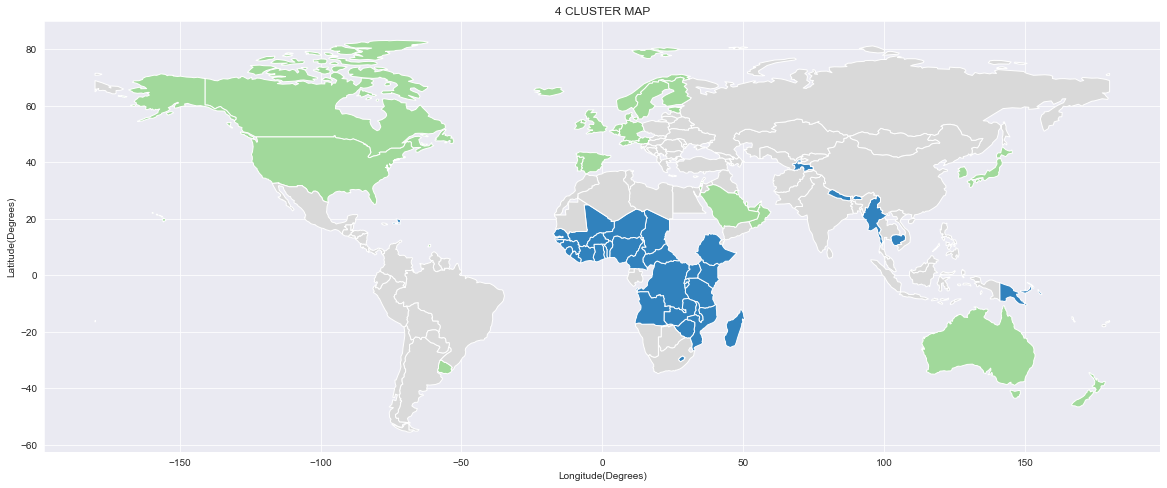

In [83]:

fig, ax = plt.subplots(figsize=(20,15))
world_3.plot(ax=ax, column='cluster',cmap='tab20c')

ax.set(xlabel='Longitude(Degrees)',ylabel='Latitude(Degrees)',title='4 CLUSTER MAP')
plt.show()

###  KMEANS 3 CLUSTERS GDP vs DIABETES


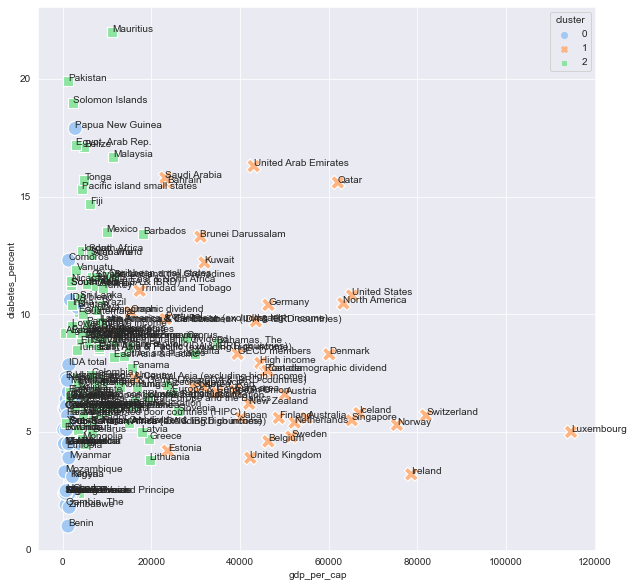

In [84]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(data=df_cluster_3,x='gdp_per_cap',y='diabetes_percent',style='cluster', hue='cluster', palette='pastel',s=200)


for i in range (len(df_cluster_3)):
    ax.annotate(df_cluster_3['Country'].iloc[i], (df_cluster_3['gdp_per_cap'].iloc[i],df_cluster_3['diabetes_percent'].iloc[i]))
plt.show()

### KMEANS 3 CLUSTERS CO2 Emission vs Renwable Energy %

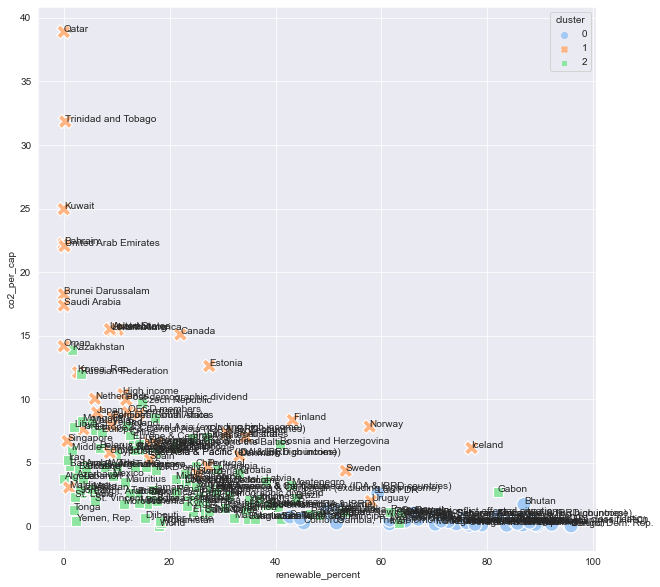

In [85]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(data=df_cluster_3,x='renewable_percent',y='co2_per_cap',style='cluster', hue='cluster', palette='pastel',s=200)


for i in range (len(df_cluster_3)):
    ax.annotate(df_cluster_3['Country'].iloc[i], (df_cluster_3['renewable_percent'].iloc[i],df_cluster_3['co2_per_cap'].iloc[i]))
plt.show()

### KMEANS WITH  7 CLUSTERS

In [29]:
from sklearn.cluster import KMeans

#labels
model_7 = KMeans(n_clusters=7, random_state = 1000).fit(df_num_stand)

df_num_stand["cluster"] = model_7.labels_ #adding a column that tells in which cluster a record ends up
df_num_stand

,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution,cluster
0,-0.375582,-0.039056,1.286480,0.059768,0.743424,-0.043652,-1.068189,0.410847,3
1,-0.167159,0.213330,1.038565,0.760493,0.298141,0.320891,-0.895526,0.410797,3
2,0.141508,0.673861,-0.419779,0.368546,-0.646054,-0.194312,-0.592819,0.330199,3
3,-0.532088,-0.221578,0.617897,-0.379285,-0.178841,0.592224,-0.285111,0.385399,5
4,-0.112387,0.548582,0.101561,0.311821,-0.591736,-0.075532,-0.711929,0.288020,3
...,...,...,...,...,...,...,...,...,...
205,-0.560223,-0.243668,1.112572,-0.716610,-0.483518,1.530004,0.100072,0.410847,5
206,-0.581515,0.444977,-0.500717,-0.432725,-0.989698,1.007091,0.059478,0.410847,3
207,-0.684813,-0.826548,-0.664781,-0.741932,1.303177,0.977068,-1.134512,0.410847,4
208,-0.656567,-1.183143,-0.910876,-0.756083,1.002354,0.660593,1.992903,0.410847,1


In [30]:
# ADDING CLUSTER TO THE ORIGINAL DATAFRAME WITH COUNTRY NAMES AGAIN
df_cluster_7=pd.concat([df.reset_index(drop=True),df_num_stand.cluster.reset_index(drop=True)],axis=1)
df_cluster_7

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution,cluster
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000,3
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738,3
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799,3
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070,5
4,East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523,3
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Vanuatu,2.998820e+05,9.342400e+08,3115.358620,70.323000,11.900000,0.527000,4.408000,74.606000,36.111065,100.000000,5
206,Vietnam,9.646211e+07,2.619212e+11,2715.276036,75.317000,6.000000,2.057566,2.022000,63.372000,34.998570,100.000000,3
207,"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,12.830000,62.727000,2.276417,100.000000,4
208,Zambia,1.786103e+07,2.330977e+10,1305.063254,63.510000,4.500000,0.314183,11.412000,55.928000,87.985452,100.000000,1


In [31]:
df_cluster_7['cluster'].value_counts()

3    66
1    51
4    28
5    24
6    18
0    16
2     7
Name: cluster, dtype: int64

### KMEANS MAP PRESENTATION 7 CLUSTERS

In [32]:
world_7=world.merge(df_cluster_7[['Country','cluster']], on='Country', how='left')
world_7['cluster']=world_7['cluster']

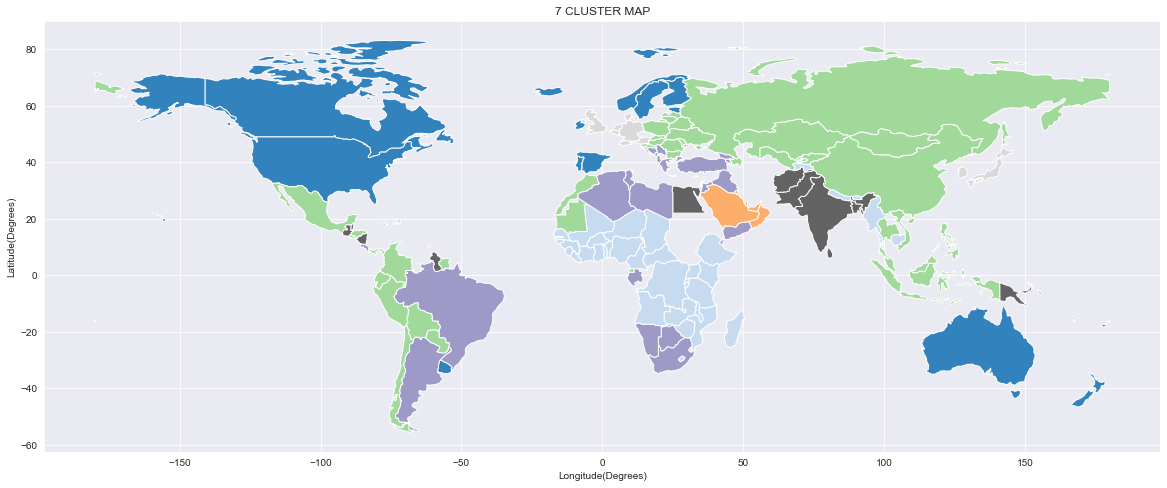

In [33]:
fig, ax = plt.subplots(figsize=(20,15))
world_7.plot(ax=ax, column='cluster',cmap='tab20c',label='abc')
ax.set(xlabel='Longitude(Degrees)',ylabel='Latitude(Degrees)',title='7 CLUSTER MAP')


plt.show()

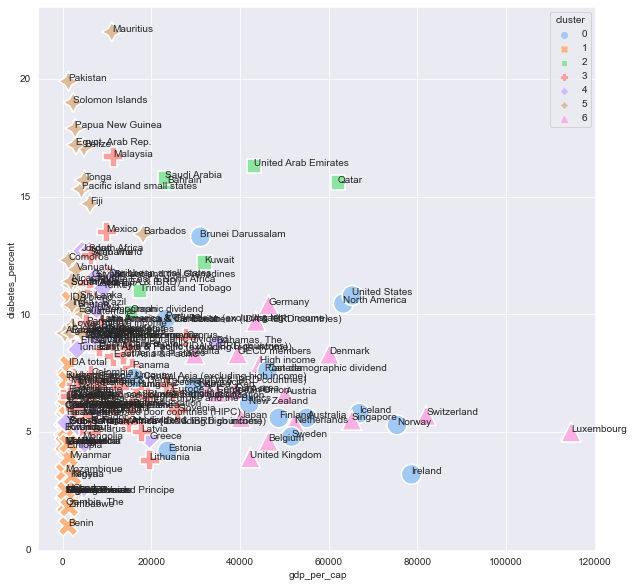

In [34]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(data=df_cluster_7,x='gdp_per_cap',y='diabetes_percent',style='cluster', hue='cluster', palette='pastel',s=400)


for i in range (len(df_cluster_7)):
    ax.annotate(df_cluster_7['Country'].iloc[i], (df_cluster_7['gdp_per_cap'].iloc[i],df_cluster_7['diabetes_percent'].iloc[i]))

# Hierarchical Clustering (Agglomerative)
DIDNT MAKE IT WORK

In [35]:
# starting point my standardized dataframe
df_agg=df_num_stand.drop(['cluster'],axis=1)


In [36]:
from sklearn.cluster import AgglomerativeClustering #is hierarchial clustering

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

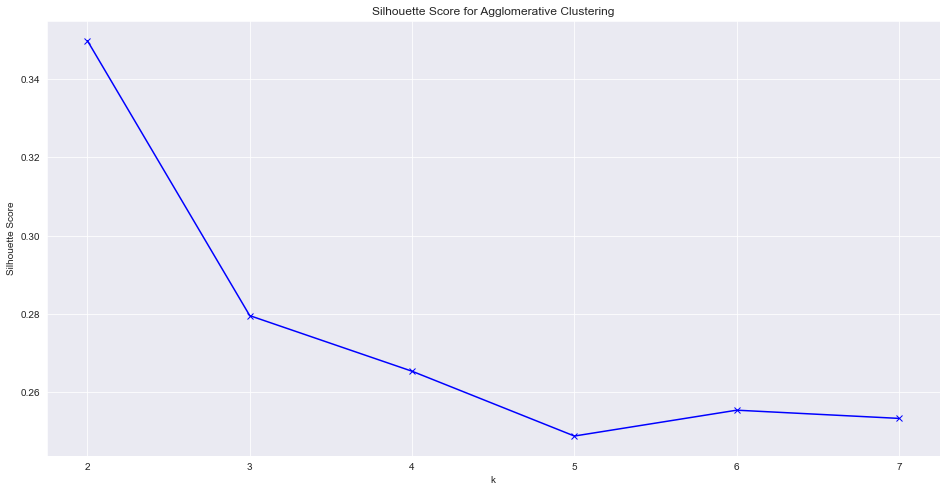

In [37]:
K = range(2, 8)#different number of clusters
silhouette = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(df_agg)
    silhouette.append(silhouette_score(df_agg, model.fit_predict(df_agg)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

# only wants 2 clusters

In [38]:
model_agg = AgglomerativeClustering(n_clusters=2)# chose number of clusters by n_clusters, distance_thershold would be a different option
df_agg['cluster'] = model_agg.fit_predict(df_agg)
df_agg.head()

,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution,cluster
0,-0.375582,-0.039056,1.286480,0.059768,0.743424,-0.043652,-1.068189,0.410847,0
1,-0.167159,0.213330,1.038565,0.760493,0.298141,0.320891,-0.895526,0.410797,0
2,0.141508,0.673861,-0.419779,0.368546,-0.646054,-0.194312,-0.592819,0.330199,0
3,-0.532088,-0.221578,0.617897,-0.379285,-0.178841,0.592224,-0.285111,0.385399,0
4,-0.112387,0.548582,0.101561,0.311821,-0.591736,-0.075532,-0.711929,0.288020,0


In [39]:
# ADDING CLUSTER TO THE ORIGINAL DATAFRAME WITH COUNTRY NAMES AGAIN
df_agg_2=pd.concat([df.reset_index(drop=True),df_agg.cluster.reset_index(drop=True)],axis=1)
df_agg_2['cluster'].value_counts()

0    165
1     45
Name: cluster, dtype: int64

In [40]:
df_agg_2

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution,cluster
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000,0
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738,0
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799,0
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070,0
4,East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523,0
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Vanuatu,2.998820e+05,9.342400e+08,3115.358620,70.323000,11.900000,0.527000,4.408000,74.606000,36.111065,100.000000,0
206,Vietnam,9.646211e+07,2.619212e+11,2715.276036,75.317000,6.000000,2.057566,2.022000,63.372000,34.998570,100.000000,0
207,"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,12.830000,62.727000,2.276417,100.000000,0
208,Zambia,1.786103e+07,2.330977e+10,1305.063254,63.510000,4.500000,0.314183,11.412000,55.928000,87.985452,100.000000,0


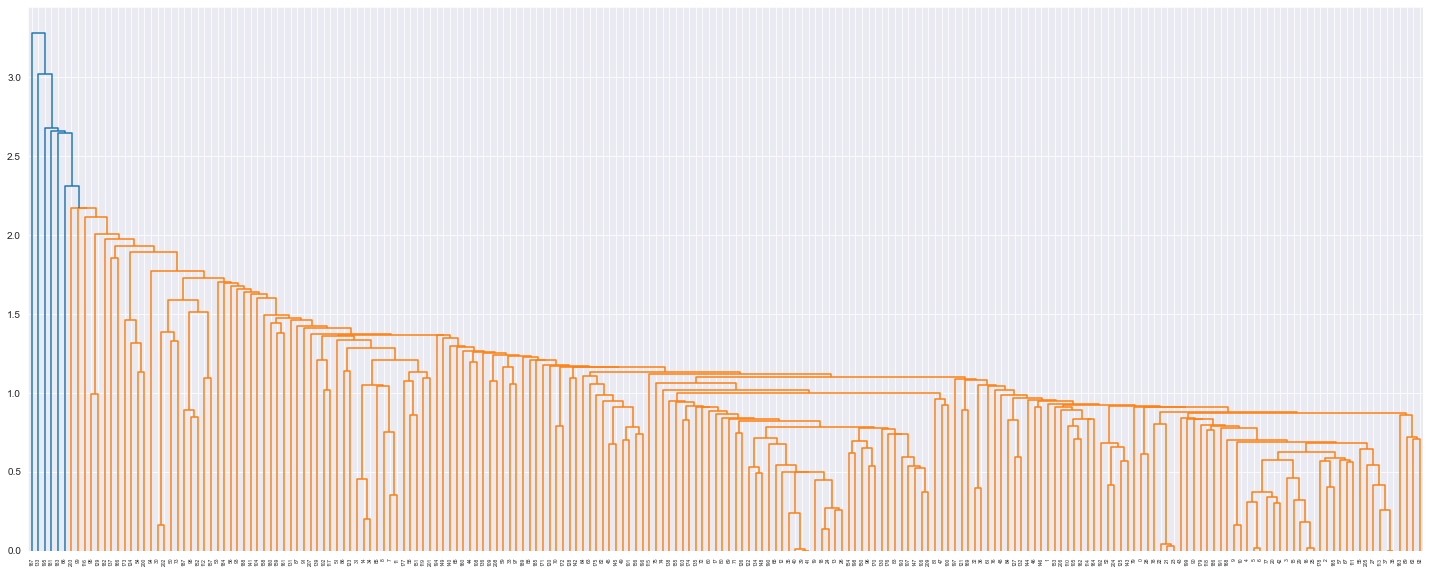

In [41]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_agg)
plt.figure(figsize=(25, 10))
dendrogram(Z) 
#plt.xticks(np.arange(len(df_agg_2)),list(df_agg_2.Country))
plt.show()

In [42]:
#######################DIDNT MAKE IT WORK#######################

# PCA


In [43]:
#overviewing our features
df.columns

Index(['Country', 'population', 'GDP_in_Dollar', 'gdp_per_cap', 'life_exp',
       'diabetes_percent', 'co2_per_cap', 'unemp', 'rural_pop',
       'renewable_percent', 'airpollution'],
      dtype='object')

In [44]:
from sklearn.decomposition import PCA

X=df.drop(['Country','population', 'gdp_per_cap'],axis=1)
#gdp_per_cap important!

pca=PCA(n_components=4)
pca.fit(X)
components=pca.transform(X)
pd.DataFrame(components)


,0,1,2,3
0,-5.990472e+11,17.885499,-23.714881,10.382444
1,-3.338740e+12,12.633127,-21.326156,14.919534
2,-1.747610e+12,12.657548,-14.902345,1.917352
3,8.573405e+12,-10.984562,-13.042957,10.454304
4,2.357131e+13,-1.981726,-16.744327,2.671401
...,...,...,...,...
205,-3.415527e+12,-22.405650,-8.373883,23.757691
206,-3.154540e+12,-14.835856,-8.331680,14.548590
207,-3.393881e+12,7.405982,-24.843030,29.310186
208,-3.393152e+12,-50.578838,17.463996,-16.801264


# KMEANS CLUSTERIN WITHOUT ANY GDP VALUE

In [45]:
#picking countries
df=pd.DataFrame()
df['Country']=list(wb.get_countries()['name'].loc[wb.get_countries()['region'] != 'Aggregates'])

In [46]:
indicators = ["SP.POP.TOTL","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD",'SP.DYN.LE00.IN','SH.STA.DIAB.ZS','EN.ATM.CO2E.PC','SE.PRM.ENRL.TC.ZS','SL.UEM.TOTL.ZS','SE.XPD.TOTL.GD.ZS','SP.RUR.TOTL.ZS','EG.FEC.RNEW.ZS','EN.ATM.PM25.MC.ZS']
from functools import reduce
data_all = []
for i in range(0, (len(indicators))):
    data = pd.DataFrame(wb.get_series(indicators[i],mrv=1)).reset_index()
    data = data.drop(labels=['Series','Year'],axis='columns')
    data_all.append(data)
    
data_all
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='Country'), data_all).rename(columns={"SP.POP.TOTL":'population',"NY.GDP.MKTP.CD":'GDP_in_Dollar','NY.GDP.PCAP.CD':'gdp_per_cap','SP.DYN.LE00.IN':'life_exp','SH.STA.DIAB.ZS':'diabetes_percent','EN.ATM.CO2E.PC':'co2_per_cap','SL.UEM.TOTL.ZS':'unemp','SE.PRM.ENRL.TC.ZS':'teacher','SP.RUR.TOTL.ZS':'rural_pop','EG.FEC.RNEW.ZS':'renewable_percent','SE.XPD.TOTL.GD.ZS':'educat_expen','EN.ATM.PM25.MC.ZS':'airpollution'})


In [47]:
df.drop(["teacher","educat_expen",'population','gdp_per_cap','GDP_in_Dollar'], axis=1, inplace=True)
df

,Country,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution
0,Arab World,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000
1,Caribbean small states,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738
2,Central Europe and the Baltics,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799
3,Early-demographic dividend,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070
4,East Asia & Pacific,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523
...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),79.568293,12.300000,NaN,8.759000,4.168000,3.877525,40.000000
260,West Bank and Gaza,73.895000,9.500000,0.740607,26.098000,23.560000,10.472715,100.000000
261,"Yemen, Rep.",66.096000,5.400000,0.390480,12.830000,62.727000,2.276417,100.000000
262,Zambia,63.510000,4.500000,0.314183,11.412000,55.928000,87.985452,100.000000


In [48]:
df.dropna(axis=0, how='any',inplace=True)
df.head()

,Country,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution
0,Arab World,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000
1,Caribbean small states,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738
2,Central Europe and the Baltics,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799
3,Early-demographic dividend,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070
4,East Asia & Pacific,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523


#### Correlation Matrix WITHOUT ANY GDP VALUES

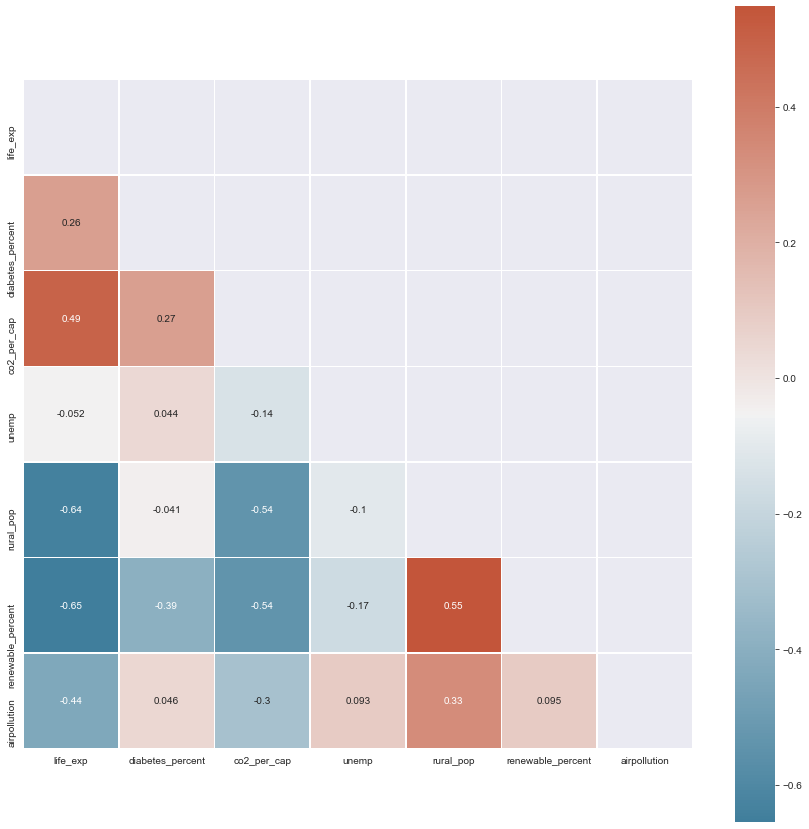

In [49]:
corr = df.corr() #correlation matix ohne gsd und ohne population
f, ax = plt.subplots(figsize=(15, 15)) 
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
#preparing cmap 
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True) 
plt.show()

In [50]:
# standardizer
from sklearn.preprocessing import StandardScaler
df_num=df.select_dtypes(include = np.number)
transformer = StandardScaler().fit(df_num)
num_stand_array = transformer.transform(df_num)
df_num_stand=pd.DataFrame(num_stand_array, columns=df_num.columns)
df_num_stand.describe()


,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution
count,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02
mean,4.702121e-16,1.326239e-16,-2.773046e-16,9.444431e-17,1.527185e-16,2.712762e-17,6.832142e-17
std,1.002270e+00,1.002270e+00,1.002270e+00,1.002270e+00,1.002270e+00,1.002270e+00,1.002270e+00
min,-2.654627e+00,-1.906102e+00,-8.175421e-01,-1.393995e+00,-1.949673e+00,-1.184649e+00,-3.619703e+00
25%,-7.107674e-01,-6.330668e-01,-6.623677e-01,-6.179457e-01,-8.449696e-01,-8.152862e-01,2.788396e-01
50%,1.929956e-01,-2.456212e-01,-3.196915e-01,-2.962392e-01,-1.597324e-02,-2.989794e-01,3.988339e-01
75%,6.867665e-01,5.000098e-01,3.225473e-01,3.968096e-01,7.806698e-01,7.078369e-01,3.988339e-01
max,1.686776e+00,3.905581e+00,6.491848e+00,4.454182e+00,2.117942e+00,2.293226e+00,3.988339e-01


#### SILOUHETTE SCORE WITHOUT ANY GDP VALUES

Text(0.5, 1.0, 'Silhouette Score for KMeans')

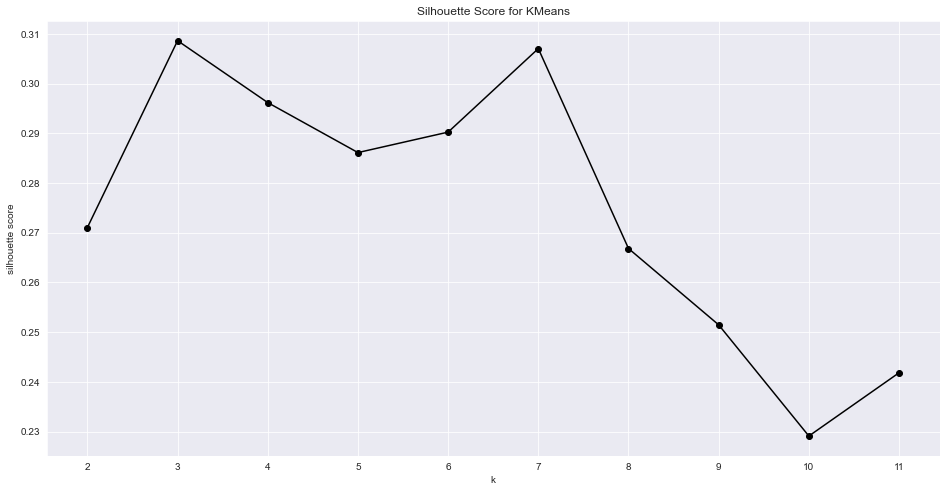

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2,12) # 
silhouette_kmeans = []

for k in K:
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(df_num_stand)
    silhouette_kmeans.append(silhouette_score(df_num_stand, model.fit_predict(df_num_stand)))

plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plt.plot(K, silhouette_kmeans, 'bo-',color='black')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for KMeans')

####
# 5 clusters looks best

In [105]:
#3 cluster solution
from sklearn.cluster import KMeans

#labels
model_3_nogdp= KMeans(n_clusters=3, random_state = 1000).fit(df_num_stand)

df_num_stand["cluster"] = model_3_nogdp.labels_ #adding a column that tells in which cluster a record ends up
df_num_stand

,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airpollution,cluster
0,-0.375582,-0.039056,1.286480,0.059768,0.743424,-0.043652,-1.068189,0.410847,0
1,-0.167159,0.213330,1.038565,0.760493,0.298141,0.320891,-0.895526,0.410797,0
2,0.141508,0.673861,-0.419779,0.368546,-0.646054,-0.194312,-0.592819,0.330199,0
3,-0.532088,-0.221578,0.617897,-0.379285,-0.178841,0.592224,-0.285111,0.385399,0
4,-0.112387,0.548582,0.101561,0.311821,-0.591736,-0.075532,-0.711929,0.288020,0
...,...,...,...,...,...,...,...,...,...
205,-0.560223,-0.243668,1.112572,-0.716610,-0.483518,1.530004,0.100072,0.410847,0
206,-0.581515,0.444977,-0.500717,-0.432725,-0.989698,1.007091,0.059478,0.410847,0
207,-0.684813,-0.826548,-0.664781,-0.741932,1.303177,0.977068,-1.134512,0.410847,0
208,-0.656567,-1.183143,-0.910876,-0.756083,1.002354,0.660593,1.992903,0.410847,2


In [106]:
df_cluster_3_nogdp=pd.concat([df.reset_index(drop=True),df_num_stand.cluster.reset_index(drop=True)],axis=1)


In [107]:
df_cluster_3_nogdp['cluster'].value_counts()

0    116
2     53
1     41
Name: cluster, dtype: int64

#### MAPPING WITHOUT ANY GDP VALUES

In [108]:
world_3_nogdp=world.merge(df_cluster_3_nogdp[['Country','cluster']], on='Country', how='left')
world_3_nogdp['cluster']=world_3_nogdp['cluster']

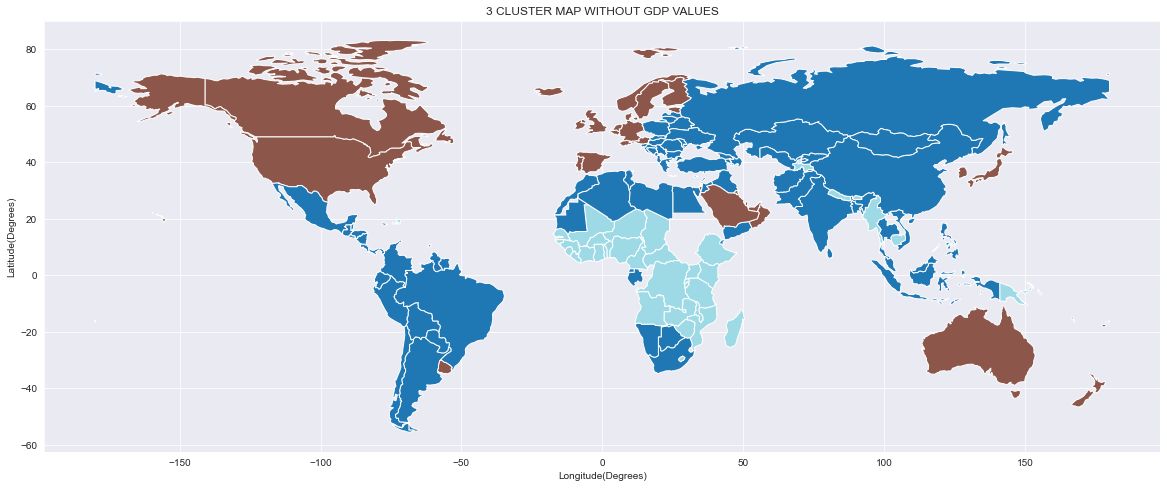

In [110]:
fig, ax = plt.subplots(figsize=(20,15))
world_3_nogdp.plot(ax=ax, column='cluster',cmap='tab20',label='abc')
ax.set(xlabel='Longitude(Degrees)',ylabel='Latitude(Degrees)',title='3 CLUSTER MAP WITHOUT GDP VALUES')


plt.show()